# IMPORT LIBRARIES

In [38]:
# Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import matplotlib as mpl
#Feature scaling and encode
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder

# Reduction Dimention
from sklearn.decomposition import PCA

# Modeling Data clustering
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
# Hyperparameter
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# Evaluation Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
#saving model
from sklearn.cluster import KMeans
import json
import joblib
import pickle


# DATA LOADING

In [2]:
db = pd.read_excel('Dataset AI improve.xlsx')
db

,no,kabupaten,provinsi,jumlah_penduduk,luas_wilayah_km2,pengeluaran_perkapita,umur,ses,kepadatan_penduduk,tahun,tpt_persen,jumlah_pasar,umk
0,1,"Kep, Seribu",JAKARTA,28240,10.18,1219497.42,5-9,C2,2774,2021,8.47,0,4394816.00
1,2,Jakarta Selatan,JAKARTA,2233855,154.32,2506430.84,35-39,B,14475,2021,5.63,27,6185279.00
2,3,Jakarta Timur,JAKARTA,3056300,182.70,2048309.48,30-34,B,16729,2021,8.39,34,5442060.00
3,4,Jakarta Pusat,JAKARTA,1066460,52.38,2162055.05,35-39,B,20360,2021,5.88,46,5099960.00
4,5,Jakarta Barat,JAKARTA,2440073,124.44,2200196.33,30-34,B,19608,2021,7.10,19,5687307.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,107,Bekasi,JAWA BARAT,2564941,206.61,2488463.13,20-24,B,12414,2021,8.81,14,4816921.17
107,108,Depok,JAWA BARAT,2085935,200.29,2304941.48,30-34,B,10415,2021,7.82,11,4377231.93
108,109,Cimahi,JAWA BARAT,571632,39.27,1827071.74,20-24,C1,14556,2021,10.77,4,3272668.50
109,110,Tasikmalaya,JAWA BARAT,723921,171.61,1310775.14,15-19,C2,4218,2021,6.62,10,2363389.67


In [3]:
db.to_csv('Dataset AI.csv')

In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   no                     111 non-null    int64  
 1   kabupaten              111 non-null    object 
 2   provinsi               111 non-null    object 
 3   jumlah_penduduk        111 non-null    int64  
 4   luas_wilayah_km2       111 non-null    float64
 5   pengeluaran_perkapita  111 non-null    float64
 6   umur                   111 non-null    object 
 7   ses                    111 non-null    object 
 8   kepadatan_penduduk     111 non-null    int64  
 9   tahun                  111 non-null    int64  
 10  tpt_persen             111 non-null    float64
 11  jumlah_pasar           111 non-null    int64  
 12  umk                    111 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 11.4+ KB


In [5]:
db.isna().sum()

no                       0
kabupaten                0
provinsi                 0
jumlah_penduduk          0
luas_wilayah_km2         0
pengeluaran_perkapita    0
umur                     0
ses                      0
kepadatan_penduduk       0
tahun                    0
tpt_persen               0
jumlah_pasar             0
umk                      0
dtype: int64

In [6]:
db['tahun'].astype(str)
db.drop(['no','tahun'], axis = 1, inplace = True)

# Data Visualization

In [7]:
def plots(df, variable):
    #create Canvas
    plt.figure(figsize=(15,5))
    
    #histogram
    plt.subplot(1,2,1)
    plt.title('Histogram ' + variable)
    sns.histplot(db[variable], color = 'b', bins = 5)
    
    
    #boxplot
    plt.subplot(1, 2, 2)
    plt.title('Boxplot ' + variable)
    sns.boxplot(y=db[variable], )
    

    plt.show()
    
    #skewness
    print(f'Nilai Skewness '+ variable,':', db[variable].skew())

# Data Cleaning

In [8]:
# find a column values
features = db.columns.values
print(features)

['kabupaten' 'provinsi' 'jumlah_penduduk' 'luas_wilayah_km2'
 'pengeluaran_perkapita' 'umur' 'ses' 'kepadatan_penduduk' 'tpt_persen'
 'jumlah_pasar' 'umk']


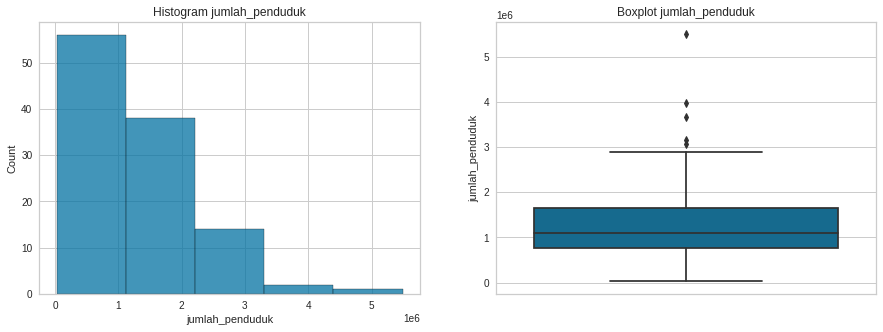

Nilai Skewness jumlah_penduduk : 1.5656354557912007


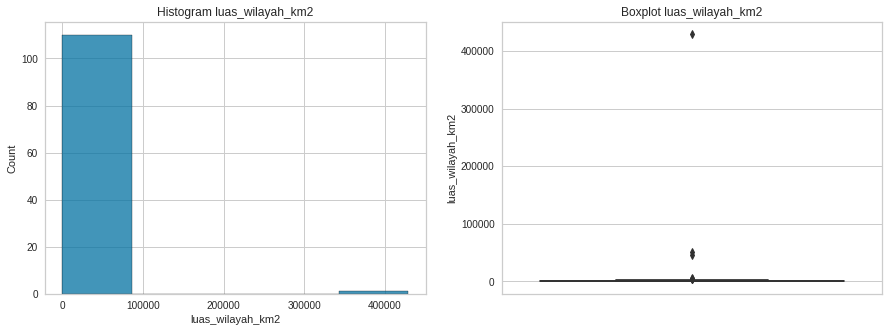

Nilai Skewness luas_wilayah_km2 : 10.173977967345412


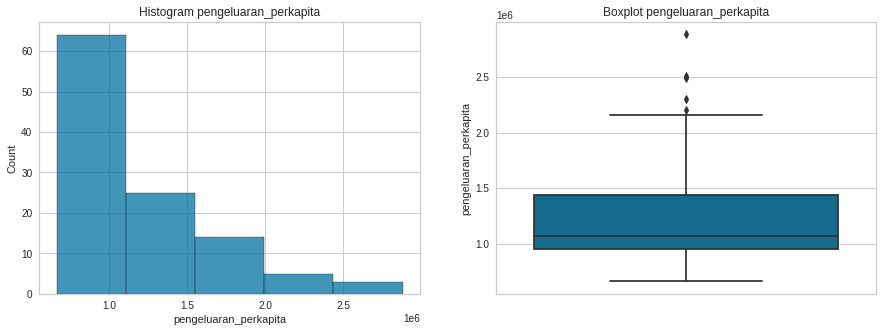

Nilai Skewness pengeluaran_perkapita : 1.459672908545585


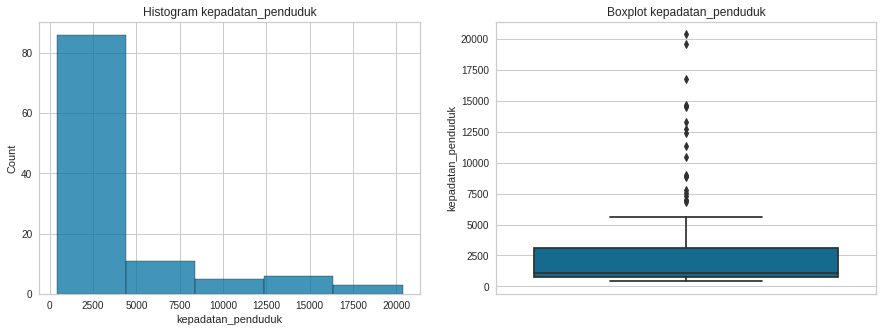

Nilai Skewness kepadatan_penduduk : 2.1465605810834902


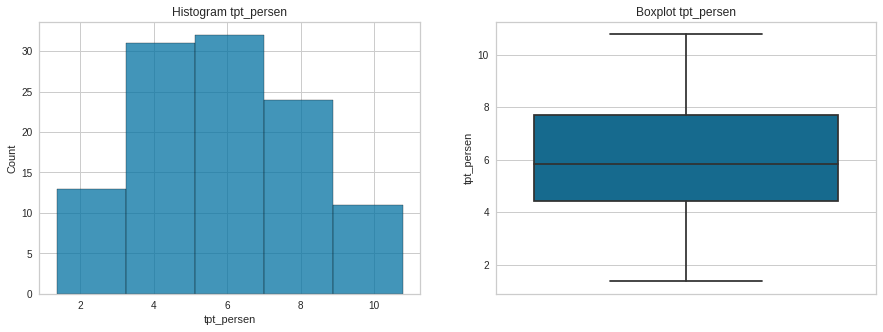

Nilai Skewness tpt_persen : 0.12248221702325396


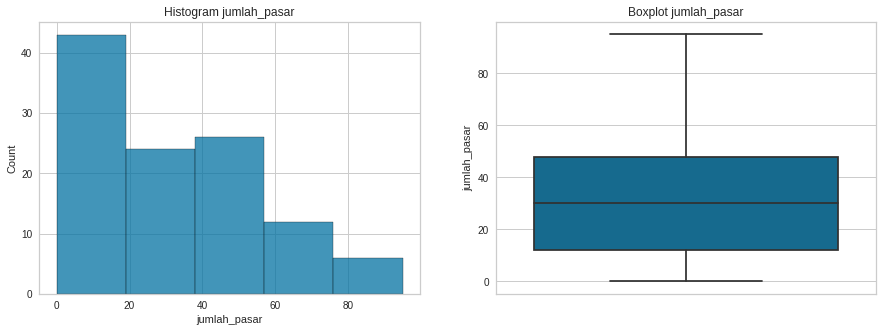

Nilai Skewness jumlah_pasar : 0.6019361682210871


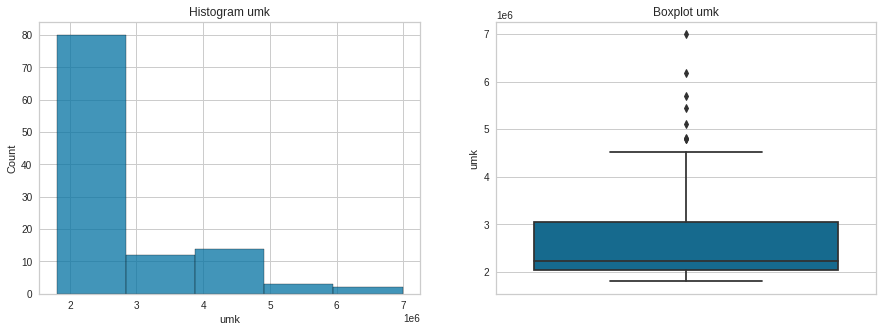

Nilai Skewness umk : 1.70604434979157


In [9]:
# Features label
features = db[['jumlah_penduduk', 'luas_wilayah_km2','pengeluaran_perkapita','kepadatan_penduduk','tpt_persen','jumlah_pasar','umk']]
# looping for plot
for i in features:
    plots(db, i)

- Dalam analisis outlier. Dilihat hampir semua feature memiliki ooutlier. Akan tetapi dikarenakan jumlah data yang sedikit dan outlier merupakan normally outliers maka tidak akan diberlakukan handling.

- saya telah melakukan handling outlier dengan trimming untuk beberapa feature dan menghasilkan semua data terhapus. Tidak bisa menggunakan capping karena data tidak melebihi 30% outlier yang ada. sehingga tidak diberlakukannya handling outliers

**If i handling Outliers :**

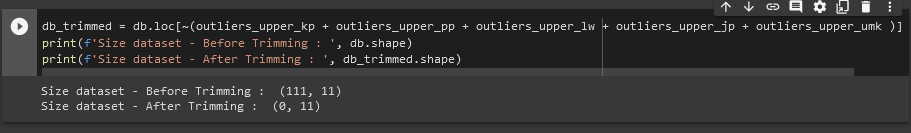

# DATA PROCESSING

In [10]:
num_columns = db.select_dtypes(include=np.number).columns.tolist()
cat_columns = db.select_dtypes(include=['object']).columns.tolist()
print(f'Number Columns : ', num_columns)
print(f'Categorical Columns : ', cat_columns)

Number Columns :  ['jumlah_penduduk', 'luas_wilayah_km2', 'pengeluaran_perkapita', 'kepadatan_penduduk', 'tpt_persen', 'jumlah_pasar', 'umk']
Categorical Columns :  ['kabupaten', 'provinsi', 'umur', 'ses']


In [11]:
scaler = MinMaxScaler()

# fit and transform the num_columns
scaled_num_columns = scaler.fit_transform(db[['jumlah_penduduk', 'luas_wilayah_km2', 'pengeluaran_perkapita', 'kepadatan_penduduk', 'tpt_persen', 'jumlah_pasar', 'umk']])
data_scaler = scaler.transform(db[['jumlah_penduduk', 'luas_wilayah_km2', 'pengeluaran_perkapita', 'kepadatan_penduduk', 'tpt_persen', 'jumlah_pasar', 'umk']])
data_model_scaler= pd.DataFrame(data_scaler, columns= num_columns)
data_model_scaler

,jumlah_penduduk,luas_wilayah_km2,pengeluaran_perkapita,kepadatan_penduduk,tpt_persen,jumlah_pasar,umk
0,0.000000,0.000000,0.250698,0.118805,0.754777,0.000000,0.499504
1,0.403863,0.000336,0.830523,0.705116,0.453291,0.284211,0.844835
2,0.554458,0.000402,0.624117,0.818059,0.746285,0.357895,0.701488
3,0.190105,0.000098,0.675365,1.000000,0.479830,0.484211,0.635507
4,0.441623,0.000266,0.692550,0.962319,0.609342,0.200000,0.748790
...,...,...,...,...,...,...,...
106,0.464487,0.000458,0.822428,0.601844,0.790870,0.147368,0.580916
107,0.376778,0.000443,0.739742,0.501679,0.685775,0.115789,0.496113
108,0.099499,0.000068,0.524439,0.709175,0.998938,0.042105,0.283073
109,0.127384,0.000376,0.291823,0.191161,0.558386,0.105263,0.107698


In [12]:
encode = OrdinalEncoder()
encode_num_columns = encode.fit_transform(db[['kabupaten', 'provinsi', 'umur', 'ses']])
data_encode = encode.transform(db[['kabupaten', 'provinsi', 'umur', 'ses']])
data_model_encode= pd.DataFrame(data_encode, columns= cat_columns)
data_model_encode

,kabupaten,provinsi,umur,ses
0,78.0,0.0,8.0,2.0
1,16.0,0.0,5.0,0.0
2,17.0,0.0,4.0,0.0
3,15.0,0.0,5.0,0.0
4,14.0,0.0,4.0,0.0
...,...,...,...,...
106,4.0,1.0,2.0,0.0
107,10.0,1.0,4.0,0.0
108,8.0,1.0,2.0,1.0
109,104.0,1.0,1.0,2.0


In [13]:
data_final = pd.concat([data_model_scaler, data_model_encode], axis = 1)
data_final

,jumlah_penduduk,luas_wilayah_km2,pengeluaran_perkapita,kepadatan_penduduk,tpt_persen,jumlah_pasar,umk,kabupaten,provinsi,umur,ses
0,0.000000,0.000000,0.250698,0.118805,0.754777,0.000000,0.499504,78.0,0.0,8.0,2.0
1,0.403863,0.000336,0.830523,0.705116,0.453291,0.284211,0.844835,16.0,0.0,5.0,0.0
2,0.554458,0.000402,0.624117,0.818059,0.746285,0.357895,0.701488,17.0,0.0,4.0,0.0
3,0.190105,0.000098,0.675365,1.000000,0.479830,0.484211,0.635507,15.0,0.0,5.0,0.0
4,0.441623,0.000266,0.692550,0.962319,0.609342,0.200000,0.748790,14.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
106,0.464487,0.000458,0.822428,0.601844,0.790870,0.147368,0.580916,4.0,1.0,2.0,0.0
107,0.376778,0.000443,0.739742,0.501679,0.685775,0.115789,0.496113,10.0,1.0,4.0,0.0
108,0.099499,0.000068,0.524439,0.709175,0.998938,0.042105,0.283073,8.0,1.0,2.0,1.0
109,0.127384,0.000376,0.291823,0.191161,0.558386,0.105263,0.107698,104.0,1.0,1.0,2.0


In [14]:
# Checking with VIF
vif_data = pd.DataFrame()
vif_data['features'] = db.columns.values

vif_data['VIF'] = [variance_inflation_factor(data_final.values, i)for i in range(len(data_final.columns))]

vif_data

,features,VIF
0,kabupaten,5.740121
1,provinsi,1.129437
2,jumlah_penduduk,16.680582
3,luas_wilayah_km2,5.508314
4,pengeluaran_perkapita,8.039390
5,umur,3.996408
6,ses,4.817666
7,kepadatan_penduduk,4.462324
8,tpt_persen,8.612866
9,jumlah_pasar,2.973612


- Mengambil feature pada tabel VIF didasarkan dari nilai VIF yang diatas 5. Sehingga dari data diatas didapatkan bahwa 6 feature yang akan diambil.


# MODELING

In [15]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(data_final)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2','pc3', 'pc4','pc5', 'pc6',])
principalDf

,pc1,pc2,pc3,pc4,pc5,pc6
0,25.804481,4.437278,2.001701,-1.820406,-0.427313,-0.125354
1,-36.138219,0.392346,2.994119,0.025597,-0.183934,0.143554
2,-35.122626,-0.590481,2.911039,0.029787,-0.021809,-0.065832
3,-37.137798,0.372626,2.979434,0.020300,-0.093633,0.299691
4,-38.121831,-0.635165,2.910853,0.084758,-0.257523,0.013464
...,...,...,...,...,...,...
106,-48.080673,-2.687431,2.002660,0.970636,-0.169289,-0.160724
107,-42.113745,-0.602180,2.175938,0.834485,-0.192940,0.005021
108,-44.080503,-2.581366,1.242619,0.297371,-0.397811,-0.250908
109,51.921512,-2.027997,0.839061,-0.912611,-0.272169,-0.013223


# Clustering

In [16]:
# FInd K optimal
k=[2,3,4,5,6]
kmeans_k = [KMeans(n_clusters = i, random_state = 17).fit(principalDf)
            for i in range (1,7)]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Elbow Method


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


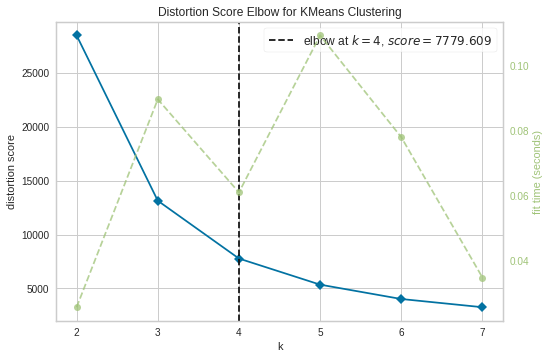

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Display Elbow method
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=7)
Elbow_M.fit(principalDf)
Elbow_M.show()

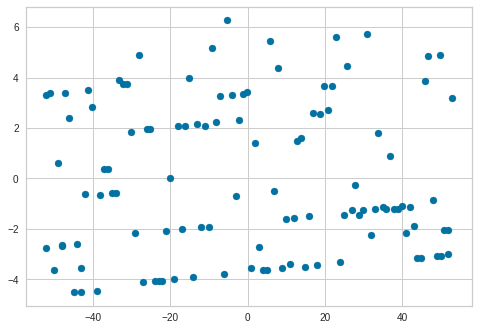

In [18]:
plt.scatter(principalDf['pc1'], principalDf['pc2'])

- Pada k-means didapatkan bahwa nilai clusteri terbaik adalah  4

## Model improvment

In [19]:
# Agglomerative

k=[2,3,4,5,6]
agglo_per_k = [AgglomerativeClustering(n_clusters=k).fit(principalDf)
                for k in range(1, 7)]
agglo_per_k

[AgglomerativeClustering(n_clusters=1),
 AgglomerativeClustering(),
 AgglomerativeClustering(n_clusters=3),
 AgglomerativeClustering(n_clusters=4),
 AgglomerativeClustering(n_clusters=5),
 AgglomerativeClustering(n_clusters=6)]

In [20]:
# creat silhouette_scores

silhouette_scores_agg = [silhouette_score(principalDf, model.labels_)
                     for model in agglo_per_k[1:]]
silhouette_scores_agg

[0.6076544474676148,
 0.515433284086844,
 0.4996465678108335,
 0.4747491009628845,
 0.453076148281666]

Elbow Method


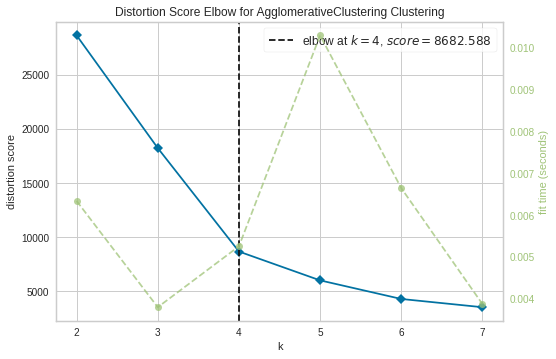

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Display Elbow Method
print('Elbow Method')
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=7)
Elbow_M.fit(principalDf)
Elbow_M.show()

- Dari hasil silhoutte ditemukan bahwa clustering terbaik ada di 4 cluster.

## Training model

### Kmeans

In [22]:
kmeans = KMeans(n_clusters = 4, random_state = 17)
kmeans.fit(principalDf)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=17)

In [23]:
kmeans.labels_

array([3, 2, 2, 2, 2, 2, 0, 2, 3, 2, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 2,
       3, 3, 0, 0, 0, 3, 3, 0, 2, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 0, 3, 3, 3, 2, 0, 0, 0, 0, 2, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 3, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1,
       2], dtype=int32)

### Agglomerative

In [24]:
agg = AgglomerativeClustering(n_clusters = 4)
agg.fit(principalDf)

AgglomerativeClustering(n_clusters=4)

In [25]:
spec = SpectralClustering(n_clusters=4, random_state=17)
spec.fit(principalDf)

SpectralClustering(n_clusters=4, random_state=17)

# Evaluasi Model

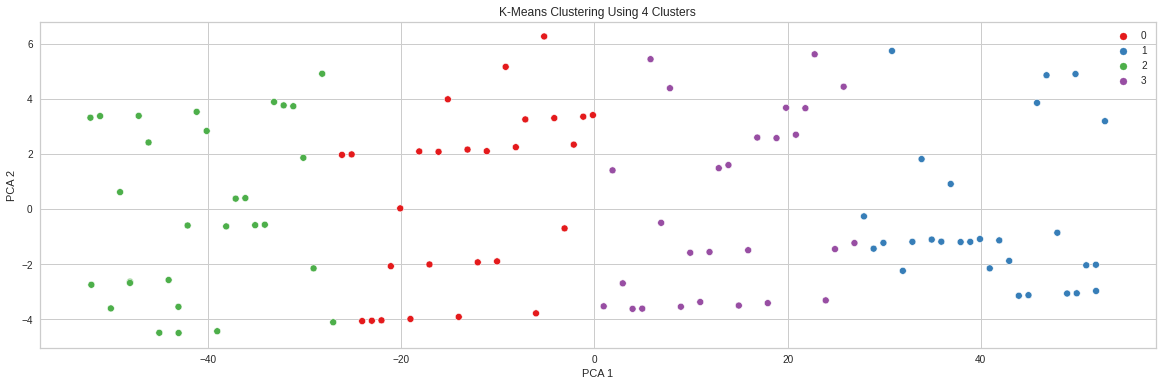

In [26]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='pc1', y='pc2', hue=kmeans.labels_, data=principalDf, palette='Set1')
plt.title('K-Means Clustering Using 4 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Evaluasi Model

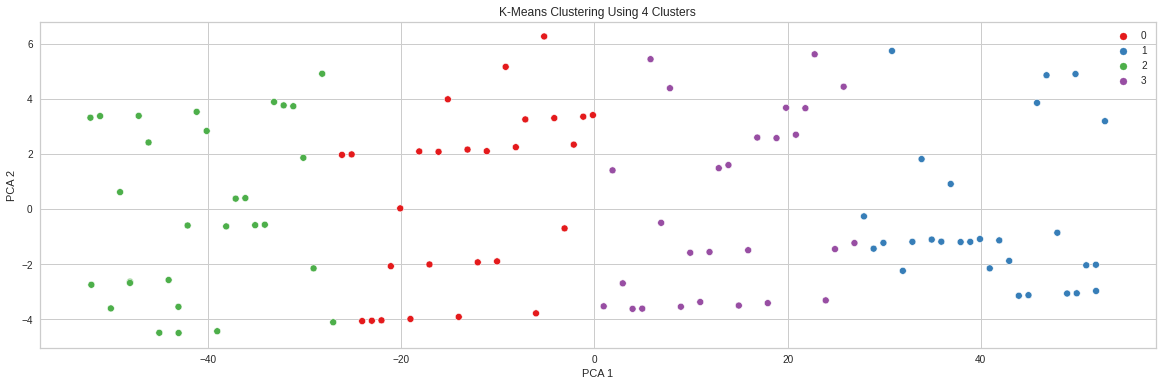

In [27]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='pc1', y='pc2', hue=kmeans.labels_, data=principalDf, palette='Set1')
plt.title('K-Means Clustering Using 4 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

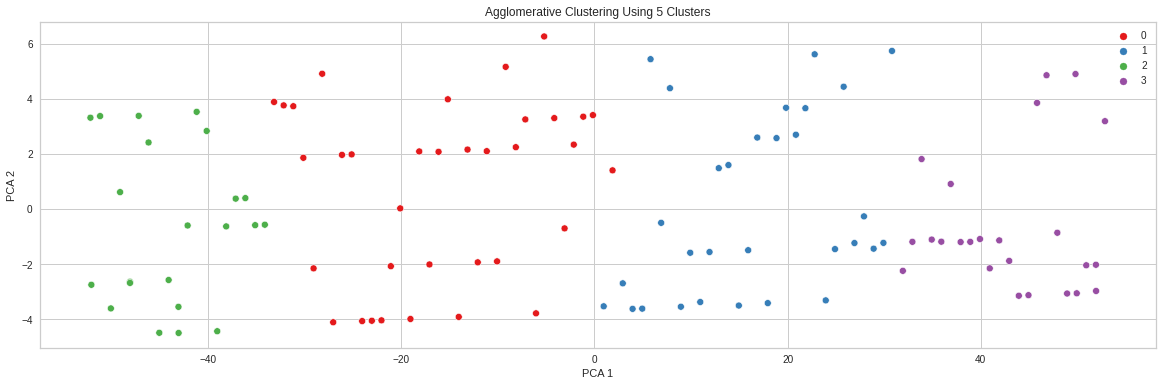

In [28]:
plt.figure(figsize=(20, 6))
sns.scatterplot(x='pc1', y='pc2', hue=agg.labels_, data=principalDf, palette='Set1')
plt.title('Agglomerative Clustering Using 5 Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# RESULT

In [29]:
result = principalDf.copy()
result["cluster"]= kmeans.labels_
result

,pc1,pc2,pc3,pc4,pc5,pc6,cluster
0,25.804481,4.437278,2.001701,-1.820406,-0.427313,-0.125354,3
1,-36.138219,0.392346,2.994119,0.025597,-0.183934,0.143554,2
2,-35.122626,-0.590481,2.911039,0.029787,-0.021809,-0.065832,2
3,-37.137798,0.372626,2.979434,0.020300,-0.093633,0.299691,2
4,-38.121831,-0.635165,2.910853,0.084758,-0.257523,0.013464,2
...,...,...,...,...,...,...,...
106,-48.080673,-2.687431,2.002660,0.970636,-0.169289,-0.160724,2
107,-42.113745,-0.602180,2.175938,0.834485,-0.192940,0.005021,2
108,-44.080503,-2.581366,1.242619,0.297371,-0.397811,-0.250908,2
109,51.921512,-2.027997,0.839061,-0.912611,-0.272169,-0.013223,1


In [30]:
data_cluster = pd.concat([db, result['cluster']], axis=1)
data_cluster = data_cluster.rename(columns={'jumlah penduduk': 'jumlah_penduduk', 'luas wilayah(km2)': 'luas_wilayah_km2','pengeluaran perkapita':'pengeluaran_perkapita', 'kepadatan penduduk':'kepadatan_penduduk'})
data_cluster

,kabupaten,provinsi,jumlah_penduduk,luas_wilayah_km2,pengeluaran_perkapita,umur,ses,kepadatan_penduduk,tpt_persen,jumlah_pasar,umk,cluster
0,"Kep, Seribu",JAKARTA,28240,10.18,1219497.42,5-9,C2,2774,8.47,0,4394816.00,3
1,Jakarta Selatan,JAKARTA,2233855,154.32,2506430.84,35-39,B,14475,5.63,27,6185279.00,2
2,Jakarta Timur,JAKARTA,3056300,182.70,2048309.48,30-34,B,16729,8.39,34,5442060.00,2
3,Jakarta Pusat,JAKARTA,1066460,52.38,2162055.05,35-39,B,20360,5.88,46,5099960.00,2
4,Jakarta Barat,JAKARTA,2440073,124.44,2200196.33,30-34,B,19608,7.10,19,5687307.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
106,Bekasi,JAWA BARAT,2564941,206.61,2488463.13,20-24,B,12414,8.81,14,4816921.17,2
107,Depok,JAWA BARAT,2085935,200.29,2304941.48,30-34,B,10415,7.82,11,4377231.93,2
108,Cimahi,JAWA BARAT,571632,39.27,1827071.74,20-24,C1,14556,10.77,4,3272668.50,2
109,Tasikmalaya,JAWA BARAT,723921,171.61,1310775.14,15-19,C2,4218,6.62,10,2363389.67,1


# ANALISIS


### Socio-economic status

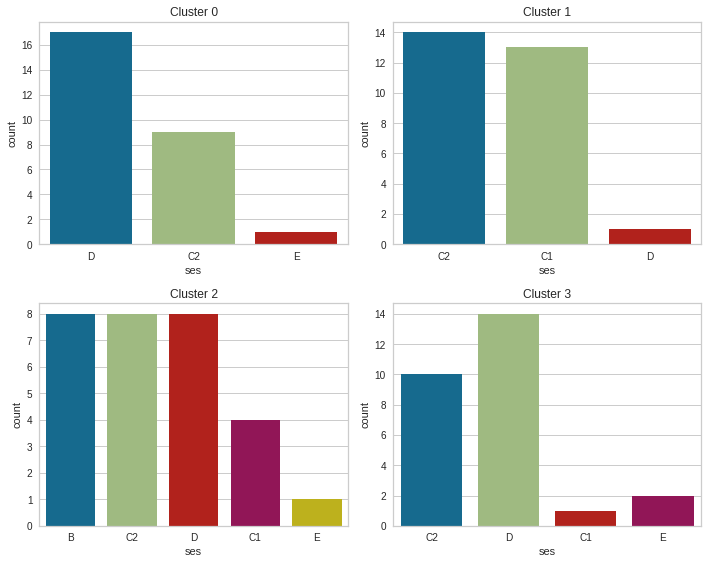

In [31]:
dfs = []

# loop over the unique values in the 'cluster' column
for i in range(data_cluster['cluster'].nunique()):
    # create a dataframe for the current cluster
    df = data_cluster[data_cluster['cluster'] == i]
    # append the dataframe to the list
    dfs.append(df)

# create subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
for i, df in enumerate(dfs):
    if i < len(axs):
        sns.countplot(data=df, x='ses', ax=axs[i])
        axs[i].set_title(f"Cluster {i}")
plt.tight_layout()
plt.show()

**ANALISIS**

1. Cluster 0 is dominated by Socio-economic status D
2. Cluster 1 is dominated by Socio-economic status C2
3. Cluster 2 is dominated by Socio-economic status B, C2 & D
4. Cluster 3 is dominated by Socio-economic status D

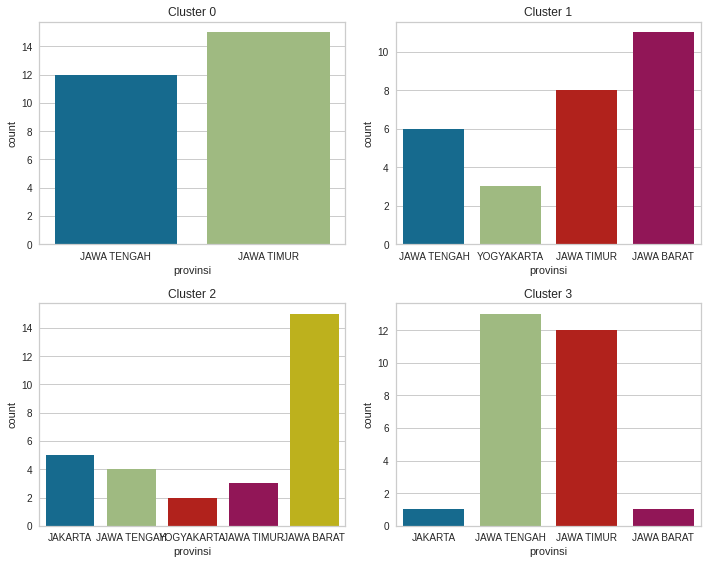

In [32]:
dfs = []

# loop over the unique values in the 'cluster' column
for i in range(data_cluster['cluster'].nunique()):
    # create a dataframe for the current cluster
    df = data_cluster[data_cluster['cluster'] == i]
    # append the dataframe to the list
    dfs.append(df)

# create subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
for i, df in enumerate(dfs):
    if i < len(axs):
        sns.countplot(data=df, x='provinsi', ax=axs[i])
        axs[i].set_title(f"Cluster {i}")
plt.tight_layout()
plt.show()

**ANALISIS**

1. Cluster 0 is dominated by `JAWA TIMUR`
2. Cluster 1 is dominated by `JAWA BARAT`
3. Cluster 2 is dominated by `JAWA BARAT`
4. Cluster 3 is dominated by `JAWA TENGAH`

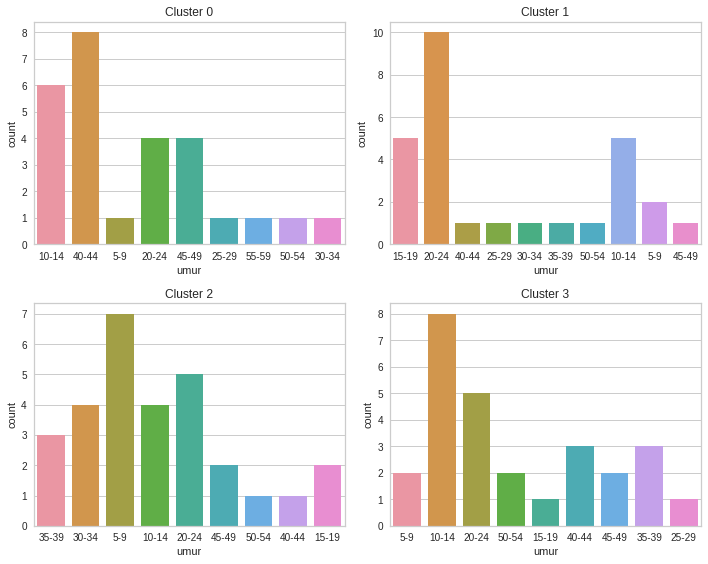

In [33]:
dfs = []

# loop over the unique values in the 'cluster' column
for i in range(data_cluster['cluster'].nunique()):
    # create a dataframe for the current cluster
    df = data_cluster[data_cluster['cluster'] == i]
    # append the dataframe to the list
    dfs.append(df)

# create subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
for i, df in enumerate(dfs):
    if i < len(axs):
        sns.countplot(data=df, x='umur', ax=axs[i])
        axs[i].set_title(f"Cluster {i}")
plt.tight_layout()
plt.show()

**ANALISIS**

1. Cluster 0 is dominated by Age `40-44`
2. Cluster 1 is dominated by Age `20-24`
3. Cluster 2 is dominated by Age `5-9`
4. Cluster 3 is dominated by Age `10-14`

# CONCLUSION


Cluster mendeskripsikan klasifikasi dari data yang ada dimana : 

1. **Cluster 0** adalah data dengan mayoritas:
  - Sosio-economic status is `D`
  - Provinsi is `JAWA TIMUR`
  - Umur is `40-44 tahun`

2. **Cluster 1** adalah data dengan mayoritas:
    - Sosio-economic status is `C2`
    - Provinsi is `JAWA BARAT`
    - Umur is `20-24 tahun`

3. **Cluster 2** adalah data dengan mayoritas:
    - Sosio-economic status is `B, C2 & D`
    - Provinsi is `JAWA BARAT`
    - Umur is `5-9 tahun`

4. **Cluster 3** adalah data dengan mayoritas:
    - Sosio-economic status is `D`
    - Provinsi is `JAWA TENGAH`
    - Umur is `10-14 tahun`

# MODEL SAVING


In [34]:
dff= data_cluster.reset_index().to_json(orient='records')

In [35]:
dff

'[{"index":0,"kabupaten":"Kep, Seribu","provinsi":"JAKARTA","jumlah_penduduk":28240,"luas_wilayah_km2":10.18,"pengeluaran_perkapita":1219497.4199999999,"umur":"5-9","ses":"C2","kepadatan_penduduk":2774,"tpt_persen":8.47,"jumlah_pasar":0,"umk":4394816.0,"cluster":3},{"index":1,"kabupaten":"Jakarta Selatan","provinsi":"JAKARTA","jumlah_penduduk":2233855,"luas_wilayah_km2":154.32,"pengeluaran_perkapita":2506430.8399999999,"umur":"35-39","ses":"B","kepadatan_penduduk":14475,"tpt_persen":5.63,"jumlah_pasar":27,"umk":6185279.0,"cluster":2},{"index":2,"kabupaten":"Jakarta Timur","provinsi":"JAKARTA","jumlah_penduduk":3056300,"luas_wilayah_km2":182.7,"pengeluaran_perkapita":2048309.48,"umur":"30-34","ses":"B","kepadatan_penduduk":16729,"tpt_persen":8.39,"jumlah_pasar":34,"umk":5442060.0,"cluster":2},{"index":3,"kabupaten":"Jakarta Pusat","provinsi":"JAKARTA","jumlah_penduduk":1066460,"luas_wilayah_km2":52.38,"pengeluaran_perkapita":2162055.0499999998,"umur":"35-39","ses":"B","kepadatan_pendudu

In [36]:
# Save with json
with open('datanew.json','w') as file:
  json.dump(dff, file)

In [40]:
joblib.dump(data_cluster, 'datanew.pkl')

['datanew.pkl']

In [41]:
with open('datanew.json', 'r') as file:
  dfx =json.load(file)
  print(dfx)

[{"index":0,"kabupaten":"Kep, Seribu","provinsi":"JAKARTA","jumlah_penduduk":28240,"luas_wilayah_km2":10.18,"pengeluaran_perkapita":1219497.4199999999,"umur":"5-9","ses":"C2","kepadatan_penduduk":2774,"tpt_persen":8.47,"jumlah_pasar":0,"umk":4394816.0,"cluster":3},{"index":1,"kabupaten":"Jakarta Selatan","provinsi":"JAKARTA","jumlah_penduduk":2233855,"luas_wilayah_km2":154.32,"pengeluaran_perkapita":2506430.8399999999,"umur":"35-39","ses":"B","kepadatan_penduduk":14475,"tpt_persen":5.63,"jumlah_pasar":27,"umk":6185279.0,"cluster":2},{"index":2,"kabupaten":"Jakarta Timur","provinsi":"JAKARTA","jumlah_penduduk":3056300,"luas_wilayah_km2":182.7,"pengeluaran_perkapita":2048309.48,"umur":"30-34","ses":"B","kepadatan_penduduk":16729,"tpt_persen":8.39,"jumlah_pasar":34,"umk":5442060.0,"cluster":2},{"index":3,"kabupaten":"Jakarta Pusat","provinsi":"JAKARTA","jumlah_penduduk":1066460,"luas_wilayah_km2":52.38,"pengeluaran_perkapita":2162055.0499999998,"umur":"35-39","ses":"B","kepadatan_penduduk

In [44]:
dfxx = joblib.load('datanew.pkl')
dfxx

,kabupaten,provinsi,jumlah_penduduk,luas_wilayah_km2,pengeluaran_perkapita,umur,ses,kepadatan_penduduk,tpt_persen,jumlah_pasar,umk,cluster
0,"Kep, Seribu",JAKARTA,28240,10.18,1219497.42,5-9,C2,2774,8.47,0,4394816.00,3
1,Jakarta Selatan,JAKARTA,2233855,154.32,2506430.84,35-39,B,14475,5.63,27,6185279.00,2
2,Jakarta Timur,JAKARTA,3056300,182.70,2048309.48,30-34,B,16729,8.39,34,5442060.00,2
3,Jakarta Pusat,JAKARTA,1066460,52.38,2162055.05,35-39,B,20360,5.88,46,5099960.00,2
4,Jakarta Barat,JAKARTA,2440073,124.44,2200196.33,30-34,B,19608,7.10,19,5687307.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
106,Bekasi,JAWA BARAT,2564941,206.61,2488463.13,20-24,B,12414,8.81,14,4816921.17,2
107,Depok,JAWA BARAT,2085935,200.29,2304941.48,30-34,B,10415,7.82,11,4377231.93,2
108,Cimahi,JAWA BARAT,571632,39.27,1827071.74,20-24,C1,14556,10.77,4,3272668.50,2
109,Tasikmalaya,JAWA BARAT,723921,171.61,1310775.14,15-19,C2,4218,6.62,10,2363389.67,1


In [51]:
dfxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   kabupaten              111 non-null    object 
 1   provinsi               111 non-null    object 
 2   jumlah_penduduk        111 non-null    int64  
 3   luas_wilayah_km2       111 non-null    float64
 4   pengeluaran_perkapita  111 non-null    float64
 5   umur                   111 non-null    object 
 6   ses                    111 non-null    object 
 7   kepadatan_penduduk     111 non-null    int64  
 8   tpt_persen             111 non-null    float64
 9   jumlah_pasar           111 non-null    int64  
 10  umk                    111 non-null    float64
 11  cluster                111 non-null    int32  
dtypes: float64(4), int32(1), int64(3), object(4)
memory usage: 10.1+ KB


# PREDICTION

In [59]:
def my_func(row, v, x, y, z):
  if row['umur'] == v and row['cluster'] == x and row['ses'] == y and row['provinsi'] == z:
    return True
  else:
    return False

# Define the inputs
v = input('Masukan Umur : ')
x = int(input('Masukan Cluster : '))
y = input('Masukan SES : ')
z = input('Masukan Provinsi: ')

filtered_data = dfxx.apply(my_func, args=( v, x, y, z), axis=1)
if filtered_data.any():
  print(dfxx[filtered_data].iloc[0])
else:
  print("Tidak ada data yang sesuai dengan kriteria yang diberikan.")


Masukan Umur : 10-14
Masukan Cluster : 2
Masukan SES : C2
Masukan Provinsi: JAWA BARAT
kabupaten                   Cirebon
provinsi                 JAWA BARAT
jumlah_penduduk             2290967
luas_wilayah_km2             984.52
pengeluaran_perkapita    1016766.58
umur                          10-14
ses                              C2
kepadatan_penduduk             2327
tpt_persen                     8.11
jumlah_pasar                     31
umk                      2279982.77
cluster                           2
Name: 92, dtype: object


In [ ]:
D